# Assignment: Data Wrangling

In [ ]:
! git clone https://github.com/DS3001/wrangling

fatal: destination path 'wrangling' already exists and is not an empty directory.


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. The paper is about how to create tidy datasets from messy datasets, and the advantages associated with having a tidy dataset. A tidy dataset is defined as a dataset with each variable as a column, each observation is a row, and each type of observational unit is a table.

2. A tidy data standard attempts to make the data cleaning process much easier as you don't have to start from scratch while cleaning each new dataset. It reduces the time taken to develop tools that work well together so that you can spend time analyzing the interesting problem rather than cleaning the data.

3. Tidy data provides a standard way to link the physical layout of the data to its meaning, whereas messy datasets all have different problems and different layouts that require custom approaches to analyze. It's hard to understand the relationships between variables and if they link to a specific observation, and different situations might call for different variables.

4. Values: numbers or strings that belong to a variable and an observation. Variables: contain all values that measure the same underlying attribute across units. Observations: contains all values measured on the same unit across attributes

5. Tidy data maps the meaning of a dataset to its structure. Each variable is a column, every observation is a row, and each type of observational unit forms a table.

6. The five most common problems with data are column headers are values instead of variable names, multiple variables are stored in one column, variables are stored in both rows and columns, multiple types of observational units are stored in the same table, and a single observational unit is stored in multiple tables. Table 4 is messy because variables form both rows and columns, and column names are values. Melting turns columns into rows.

7. Table 11 is messy because variable are stored in both columns and rows (id, year month stored within columns, d1-d31 stored across columns, and tmin and tmax stored across rows). Table 12 is molten because it has been melted so that columns have been turned into rows. The dates have been turned into rows, and tmax and tmin are now columns.

8. The chicken and egg problem with tidy data is that tidy data will always be linked to tidy tools, so there is the possibility of independently changing structure and data tools without improving workflow. Wickham hopes that in the future, others will build on the idea of tidy data and develop better tools and ideas, as well as address further unanswered problems with data cleaning.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#get DFs from csv

a_df = pd.read_csv('/content/wrangling/assignment/data/airbnb_hw.csv',low_memory=False)

s_df = pd.read_csv('/content/wrangling/assignment/data/sharks.csv',low_memory=False)

In [ ]:
#Q2 part 1

var = "Price"

#get rid of commas
a_df[var] = a_df[var].str.replace(',',"")

print(a_df["Price"].describe())

count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object


count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


<Axes: >

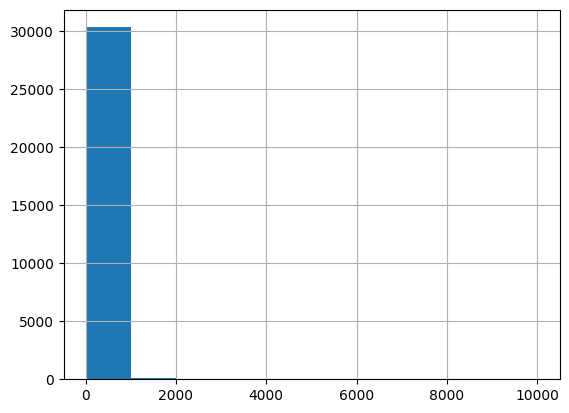

In [ ]:
#covert to numeric & make erros nan

a_df[var] = pd.to_numeric(a_df[var], errors='coerce')
print(a_df[var].describe())

a_df[var].hist()

In [ ]:
#find total missing

#make column tracking if price is nan
a_df[var+'_nan'] = a_df[var].isnull()

#sum all nans
print('Total Missings: \n', sum(a_df[var+'_nan']),'\n')


Total Missings: 
 0 



In [ ]:
#Q2 part 2
var = "Type"

print(s_df[var].unique())
print(s_df[var].value_counts())


['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg']
Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: Type, dtype: int64


In [ ]:
# replace boatomg with boating - assume mistake

s_df[var]= s_df[var].replace("Boatomg","Boating")

In [ ]:
#group questionable/unknown and change to nan because they aren't telling us anything

s_df[var]= s_df[var].replace(["Unverified","Unconfirmed","Questionable","Under investigation","Invalid"],np.nan)

In [ ]:
# group watercraft

s_df[var]= s_df[var].replace(["Sea Disaster","Watercraft","Boat","Boating"],"Watercraft")

In [ ]:
#check values again

print(s_df[var].unique())
print(s_df[var].value_counts())

['Unprovoked' 'Provoked' nan 'Watercraft']
Unprovoked    4716
Provoked       593
Watercraft     583
Name: Type, dtype: int64


In [ ]:
#Q2 part 3

#import csv from internet
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)

In [ ]:
#look at values

var = 'WhetherDefendantWasReleasedPretrial'

print(df[var].value_counts())

1    19154
0     3801
9       31
Name: WhetherDefendantWasReleasedPretrial, dtype: int64


In [ ]:
#rename column with something shorter that makes more sense

df = df.rename(columns = {"WhetherDefendantWasReleasedPretrial":"released"})

In [ ]:
#from codebook, know that the value 9 means missing, so replace all 9s with nans

df["released"] = df["released"].replace(9, np.nan)

In [ ]:
#recheck value counts
print(df["released"].value_counts())


1.0    19154
0.0     3801
Name: released, dtype: int64


In [ ]:
#Q2 part 4

var = "ImposedSentenceAllChargeInContactEvent"

print(df[var].value_counts())

sentence = df[var]


                    9053
0                   4953
12                  1404
.985626283367556    1051
6                    809
                    ... 
49.9712525667351       1
57.0349075975359       1
79.9260780287474       1
42.1642710472279       1
1.6570841889117        1
Name: ImposedSentenceAllChargeInContactEvent, Length: 484, dtype: int64


In [ ]:
#rename
stype = df["SentenceTypeAllChargesAtConvictionInContactEvent"]

print(stype.value_counts())


4    8779
0    8720
1    4299
2     914
9     274
Name: SentenceTypeAllChargesAtConvictionInContactEvent, dtype: int64


In [ ]:
#coerce to numeric

sentence = pd.to_numeric(sentence,errors = "coerce")

print(sentence)


0              NaN
1        60.000000
2        12.000000
3         0.985626
4              NaN
           ...    
22981          NaN
22982          NaN
22983          NaN
22984          NaN
22985          NaN
Name: ImposedSentenceAllChargeInContactEvent, Length: 22986, dtype: float64


In [ ]:
# Create a missing dummy:
var = "sentence"

snull = sentence.isnull()

print('Total Missings: ', sum(snull))

Total Missings:  9053


In [ ]:
print(stype.value_counts())

4    8779
0    8720
1    4299
2     914
9     274
Name: SentenceTypeAllChargesAtConvictionInContactEvent, dtype: int64


In [ ]:
pd.crosstab(stype, snull)

#There is a pattern as all of the null values are for sentence types 4 and 9
#null values are only for types 4 and 9. From codebook, 9 means missing value, but 4 must also be cases where no sentence was given.


ImposedSentenceAllChargeInContactEvent,False,True
SentenceTypeAllChargesAtConvictionInContactEvent,,
0,8720,0
1,4299,0
2,914,0
4,0,8779
9,0,274


In [ ]:
#want to replace the nan in sentence length to reflect that 4 means a sentence length of 0
#use mask to replace based on condition that stype==4
#already know that 9 means unknown, so make that data nan


sentence = sentence.mask(stype==4,0)

sentence = sentence.mask(stype==9,np.nan)


In [ ]:
#recount missing values
snull2 = sentence.isnull()

print('Total Missings: ', sum(snull2))

#all of the missing values for type 4 were replaced with 0, resulting in much fewer missing values


Total Missings:  274


In [ ]:
#replace df with clean values

df["ImposedSentenceAllChargeInContactEvent"]=sentence

**Q3.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

1. Race is divided into 5 categories: White, Black, Asian, Native Hawaiian or Pacific Islander, and American Indian or Alaska Native. Other race is also an option, and there is a write in section for further explanation. Ethnicity is recorded as hispanic or latino vs not hispanic or latino.

2. We gather this data to know the racial makeup of the US. This data can be used to understand racial inequality when analyzed across different systems in the US. It's also important to know the makeup of specific counties and states to create policies catered for those people. Politics and laws need to be representative of the county population. Bad data quality can skew results to make the country look more or less equitable. It also makes it harder to create policies that actually help the community.

3. I think offering more flexibility by including a write in section was a step in the right direction, but with the large quantity of data collected, cleaning the write in section would take an incredible amount of time. It would be really hard to get meaningful results from that part of the census. The ethnicity categories seem very narrow and not helpful unless you are only looking at hispanic vs not hispanic. The checkbox set up makes it easier to collect data on a large scale while also offering flexibility. I think the categories could potentially be increased, but I'm not sure how to increase them to create more useful data without needlessly complicating the survey.

4. The census only gathered data on current sex, not sex at birth or current gender identification. There are only two checkboxes for male and female. I think there should be a "prefer not to say" option. I think asking for sex rather than gender is a good idea because gender is so widespread and personal, so I'm not sure how useful information about gender identification would be. I do think there should be more guidelines on what exactly is meant by "current sex" to reduce ambiguity. A question on sexuality might be helpful, but it would be divided into major categories with an "other" category because there is such a wide spectrum of sexual orientations. This is important for diversity and understanding the population affected by policies.

5. Handling outliers and small population sizes for individual races and sex/genders could be difficult. Results of analytics might be skewed based on small population sizes, but these populations can't be discounted. There's also such a wide spread of these variables that it can be difficult to know when to group identities together, such as Native Indian and Alaskan Native, and when to give groups separate sections. "Other" sections also pose a difficult challenge as the makeup of these categories are unknown. When cleaning data, people might drop missing values of race and gender. This can be an issue because someone choosing not to answer those questions is a data point and tells us something about them. Those who choose not to answer are a population that needs to be represented, so discounting all information from them is a huge problem that could lead to data unrepresentative of the actual population.

6. A person choosing not to answer questions about race and sex is a data point in of itself. Creating an algorithm to guess these values takes away valuable information on a group of people that may identify differently than the survey allowed them to. Basing policies off of this data could create major issues, especially if the algorithm incorrectly represents people. The algorithm is making the missing data problem worse instead of using the missing data as additional information.